In [1]:
import pandas as pd
import numpy as np

In [2]:
dataset = pd.read_csv('housing_data.csv')

In [3]:
dataset.head()

,Unnamed: 0,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,SC60,RL,65,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,No,No,No,0,Feb,2008,WD,Normal,208500
1,1,SC20,RL,80,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,No,No,No,0,May,2007,WD,Normal,181500
2,2,SC60,RL,68,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,No,No,No,0,Sep,2008,WD,Normal,223500
3,3,SC70,RL,60,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,No,No,No,0,Feb,2006,WD,Abnorml,140000
4,4,SC60,RL,84,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,No,No,No,0,Dec,2008,WD,Normal,250000


In [4]:
print((dataset['Alley'].isna()).sum())
dataset = dataset.drop('Alley', axis=1)

1369


Handling missing data imputation using Scikit-learn's SimpleImputer

In [5]:
from sklearn.impute import SimpleImputer

numerical_cols = dataset.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = dataset.select_dtypes(include=['object']).columns

- mean for numerical columns: replaces missing values with the mean.
- most_frequent for categorical columns: replaces missing values with the most frequently repeated
- Fits the imputer to the data (learns the mean or most frequent value).
- Transforms the data by replacing missing values
- pd.concat concatenates the imputed numerical and categorical data.

In [6]:
num_imputer = SimpleImputer(strategy='mean')  
cat_imputer = SimpleImputer(strategy='most_frequent') 

num_imputed = num_imputer.fit_transform(dataset[numerical_cols])
cat_imputed = cat_imputer.fit_transform(dataset[categorical_cols]) 

Dataset= pd.concat([pd.DataFrame(num_imputed, columns=numerical_cols), 
                          pd.DataFrame(cat_imputed, columns=categorical_cols)], axis=1)
Dataset=Dataset[dataset.columns]

In [7]:
print(Dataset.shape)

(1460, 80)


In [8]:
print(Dataset.isnull().sum())

Unnamed: 0       0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 80, dtype: int64


In [9]:
print(Dataset.dtypes)

Unnamed: 0       float64
MSSubClass        object
MSZoning          object
LotFrontage      float64
LotArea          float64
                  ...   
MoSold            object
YrSold           float64
SaleType          object
SaleCondition     object
SalePrice        float64
Length: 80, dtype: object


In [10]:
Dataset.drop('Unnamed: 0', axis=1, inplace=True)

In [11]:
Dataset.drop_duplicates(inplace=True)

In [12]:
Dataset.describe()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,57.623288,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,46.549315,567.240411,...,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,2007.815753,180921.195890
std,34.664304,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,161.319273,441.866955,...,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,1.328095,79442.502883
min,0.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2006.000000,34900.000000
25%,42.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,...,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2007.000000,129975.000000
50%,63.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,...,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2008.000000,163000.000000
75%,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,0.000000,808.000000,...,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2009.000000,214000.000000
max,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,...,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,2010.000000,755000.000000


Outlier removal using IQR Method

- This code removes outliers from numerical columns in the Dataset using the Interquartile Range (IQR) method.
- It iterates through 'int64' and 'float64' columns, calculating Q1, Q3, and IQR values. 

In [13]:
for col in Dataset.select_dtypes(include=['int64', 'float64']).columns:
    Q1 = Dataset[col].quantile(0.25)
    Q3 = Dataset[col].quantile(0.75)
    IQR = Q3 - Q1
    Dataset = Dataset[~((Dataset[col] < (Q1 - 1.5 * IQR)) | (Dataset[col] > (Q3 + 1.5 * IQR)))]

- Skewness:
    - LotFrontage: slightly right-skewed
    - LotArea: highly right-skewed
    - SalePrice: highly right-skewed

Applying Square Root Transformation for LotFrontage(slightly right-skewed)


In [14]:
Dataset['LotFrontage'] = np.sqrt(Dataset['LotFrontage'])

Applying Log Transformation for LotArea and SalePrice(highly right skewed)

In [15]:
Dataset['LotArea'] = np.log(Dataset['LotArea'])
Dataset['SalePrice'] = np.log(Dataset['SalePrice'])

Zero Value Columns

In [16]:
zero_cols = Dataset.columns[Dataset.eq(0).any()]
for col in zero_cols:
    zero_count = Dataset[col].eq(0).sum()
    print(f"Zero values in {col}: {zero_count}")

Zero values in LotFrontage: 109
Zero values in MasVnrArea: 333
Zero values in BsmtFinSF1: 199
Zero values in BsmtFinSF2: 602
Zero values in BsmtUnfSF: 21
Zero values in 2ndFlrSF: 355
Zero values in LowQualFinSF: 602
Zero values in BsmtFullBath: 359
Zero values in BsmtHalfBath: 602
Zero values in HalfBath: 359
Zero values in Fireplaces: 316
Zero values in GarageCars: 25
Zero values in GarageArea: 25
Zero values in WoodDeckSF: 291
Zero values in OpenPorchSF: 237
Zero values in EnclosedPorch: 602
Zero values in 3SsnPorch: 602
Zero values in ScreenPorch: 602
Zero values in PoolArea: 602
Zero values in MiscVal: 602


Dropping columns with high zero values (> 50%)

In [17]:
cols_to_drop = ['BsmtFinSF2', 'LowQualFinSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'MiscVal']
Dataset = Dataset.drop(cols_to_drop, axis=1)

Imputing values for LotFrontage and MasVnrArea

In [18]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
Dataset[['LotFrontage', 'MasVnrArea']] = imputer.fit_transform(Dataset[['LotFrontage', 'MasVnrArea']])

In [19]:
Dataset.describe()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,...,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,PoolArea,YrSold,SalePrice
count,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,...,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.0,602.000000,602.000000
mean,6.573582,8.990516,6.186047,5.357143,1983.117940,1988.684385,75.882060,414.003322,614.611296,1028.614618,...,6.240864,0.511628,1985.645605,1.789037,465.456811,84.481728,38.651163,0.0,2007.779070,12.011051
std,3.301385,0.466240,1.214967,0.699672,24.741143,19.564562,107.317532,389.198229,428.947000,304.537369,...,1.293832,0.568763,21.819038,0.663033,182.044825,95.152547,42.540120,0.0,1.335311,0.317629
min,0.000000,7.375256,2.000000,4.000000,1910.000000,1950.000000,0.000000,0.000000,0.000000,264.000000,...,3.000000,0.000000,1914.000000,0.000000,0.000000,0.000000,0.000000,0.0,2006.000000,10.542706
25%,5.937060,8.883466,5.000000,5.000000,1966.000000,1972.000000,0.000000,0.000000,274.000000,831.250000,...,5.000000,0.000000,1971.000000,1.000000,373.500000,0.000000,0.000000,0.0,2007.000000,11.799042
50%,7.937254,9.089470,6.000000,5.000000,1995.000000,1999.000000,0.000000,407.500000,517.000000,972.000000,...,6.000000,0.000000,1995.000000,2.000000,472.000000,44.500000,30.000000,0.0,2008.000000,12.043554
75%,8.660254,9.273151,7.000000,6.000000,2004.000000,2005.000000,142.750000,698.500000,881.500000,1239.250000,...,7.000000,1.000000,2004.000000,2.000000,572.000000,156.000000,60.000000,0.0,2009.000000,12.230643
max,11.401754,9.764225,10.000000,7.000000,2009.000000,2010.000000,420.000000,1567.000000,1709.000000,1844.000000,...,10.000000,2.000000,2010.000000,3.000000,912.000000,370.000000,160.000000,0.0,2010.000000,12.676076


1. Column removal can change data distribution.
2. Imputation introduces new values, potentially affecting outlier detection


Reapplying IQR method

In [20]:
Q1 = Dataset['SalePrice'].quantile(0.25)
Q3 = Dataset['SalePrice'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
Dataset_final_outlier_free = Dataset[(Dataset['SalePrice'] > lower_bound) & (Dataset['SalePrice'] < upper_bound)]

Univariate Analysis :-

In [21]:
print(Dataset_final_outlier_free.dtypes)

MSSubClass        object
MSZoning          object
LotFrontage      float64
LotArea          float64
Street            object
                  ...   
MoSold            object
YrSold           float64
SaleType          object
SaleCondition     object
SalePrice        float64
Length: 73, dtype: object


 Identifying categorical columns


In [22]:
categorical_cols = Dataset_final_outlier_free.select_dtypes(include=['object']).columns
print(categorical_cols)

Index(['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC',
       'Fence', 'MiscFeature', 'MoSold', 'SaleType', 'SaleCondition'],
      dtype='object')


Investigating constant values

In [23]:
constant_cols = Dataset_final_outlier_free.columns[Dataset_final_outlier_free.nunique() == 1]
print(constant_cols)

Index(['Utilities', 'Condition2', 'RoofMatl', 'BsmtFinType2', 'BsmtHalfBath',
       'KitchenAbvGr', 'PoolArea', 'PoolQC'],
      dtype='object')


In [24]:
print(Dataset_final_outlier_free.isnull().sum())

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 73, dtype: int64


In [25]:
constant_cols = ['BsmtHalfBath', 'KitchenAbvGr', 'PoolArea']
Dataset_final_outlier_free = Dataset_final_outlier_free.drop(constant_cols, axis=1)
DATASET = Dataset_final_outlier_free

In [26]:
DATASET = Dataset_final_outlier_free
print(DATASET.dtypes)

MSSubClass        object
MSZoning          object
LotFrontage      float64
LotArea          float64
Street            object
                  ...   
MoSold            object
YrSold           float64
SaleType          object
SaleCondition     object
SalePrice        float64
Length: 70, dtype: object


In [27]:
street_values = DATASET['Street']

The following histograms display the distribution of numerical columns in the dataset

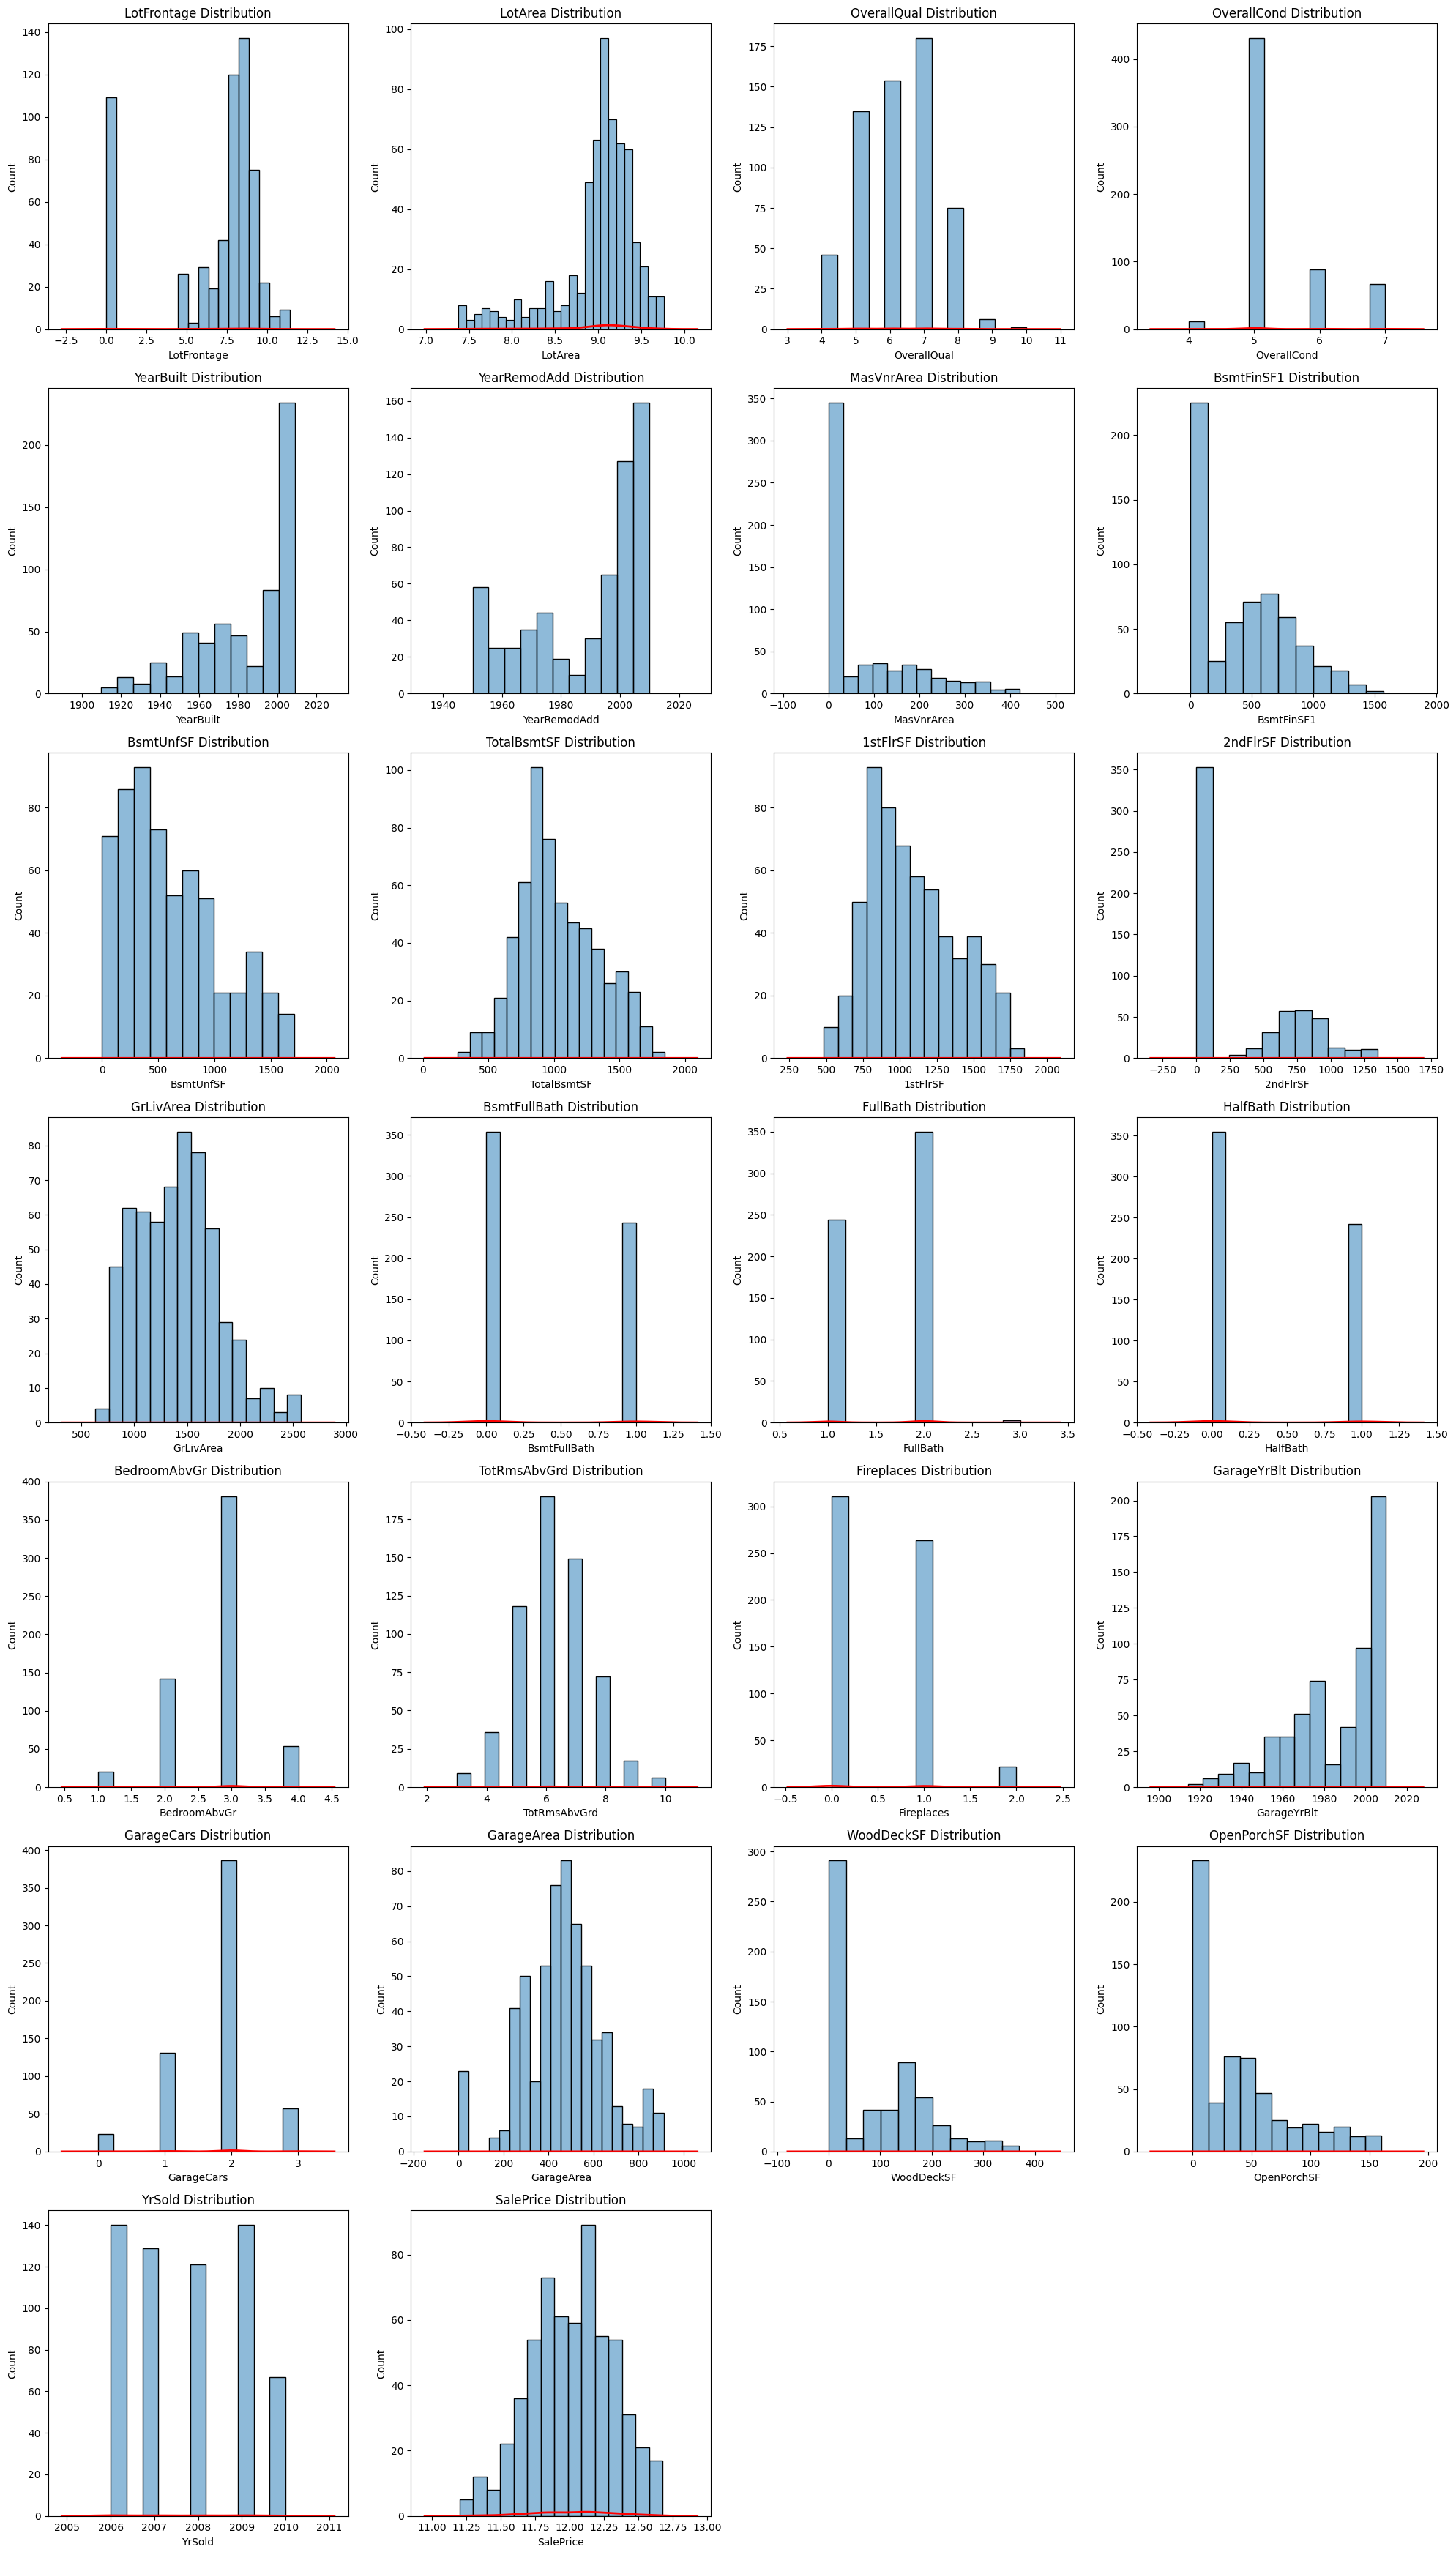

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

numerical_cols = DATASET.select_dtypes(include=['int64', 'float64']).columns
n = len(numerical_cols)
rows = (n + 3) // 4
cols = 4

fig, axes = plt.subplots(rows, cols, figsize=(20, rows * 5))

for i, col in enumerate(numerical_cols):
    ax = axes[i // 4, i % 4]
    sns.histplot(DATASET[col], ax=ax, alpha=0.5)
    sns.kdeplot(DATASET[col], ax=ax, color='red', lw=2, warn_singular=False)
    
    ax.set_title(f'{col} Distribution')

for i in range(len(numerical_cols), rows * cols):
    axes[i // 4, i % 4].axis('off')

plt.tight_layout()
plt.show()

Multivariate Analysis :-

- There is a column with non-numeric data (specifically, strings) in the dataset. The corr() function requires all columns to be numeric.
   - Performing Mutual Information(MI)
   - Getting non-numeric columns
   - Encoding categorical variables 
   - Calculating mutual information

In [29]:
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import LabelEncoder

non_numeric_cols = DATASET.select_dtypes(exclude=['int64', 'float64']).columns

le = LabelEncoder()
for col in non_numeric_cols:
    DATASET[col] = le.fit_transform(DATASET[col])

mi_values = {}
for col in non_numeric_cols:
    mi = mutual_info_regression(DATASET[[col]], DATASET['SalePrice'])[0]
    mi_values[col] = mi

Sort mi_values by mutual information score

In [30]:
mi_sorted = sorted(mi_values.items(), key=lambda x: x[1], reverse=True)
print(mi_sorted)

[('Neighborhood', np.float64(0.4403440287900291)), ('KitchenQual', np.float64(0.3757761642220747)), ('ExterQual', np.float64(0.32800047240033336)), ('Foundation', np.float64(0.32771616177229523)), ('BsmtQual', np.float64(0.30919251610576803)), ('GarageFinish', np.float64(0.2811722625032522)), ('MSSubClass', np.float64(0.25945482383783247)), ('GarageType', np.float64(0.22440550753100363)), ('HeatingQC', np.float64(0.22149332866426885)), ('Exterior2nd', np.float64(0.2142294391881565)), ('BsmtFinType1', np.float64(0.1902861972536103)), ('Exterior1st', np.float64(0.18404751512376638)), ('FireplaceQu', np.float64(0.11907067840538876)), ('MSZoning', np.float64(0.10981086844654508)), ('HouseStyle', np.float64(0.0876701055609348)), ('LotShape', np.float64(0.0725617337034512)), ('GarageQual', np.float64(0.07057979697965067)), ('BsmtExposure', np.float64(0.06578184562238065)), ('SaleCondition', np.float64(0.058237958890036357)), ('MasVnrType', np.float64(0.056534007264573916)), ('GarageCond', np

Top 5 Features by Mutual Information:

1. Neighborhood (0.4255)
2. KitchenQual (0.3896)
3. ExterQual (0.3363)
4. Foundation (0.3227)
5. BsmtQual (0.3066)

These features have the strongest relationships with SalePrice.

Bottom 5 Features by Mutual Information:

1. MoSold (0.0)
2. PoolQC (0.0)
3. Heating (0.0)
4. BsmtFinType2 (0.0)
5. RoofMatl (0.0)

These features have little to no relationship with SalePrice

Dropping features with low mutual information.

In [31]:
threshold = 0.1
columns_to_drop = [col for col, mi in mi_sorted if mi < threshold]
DATASET.drop(columns_to_drop, axis=1, inplace=True)

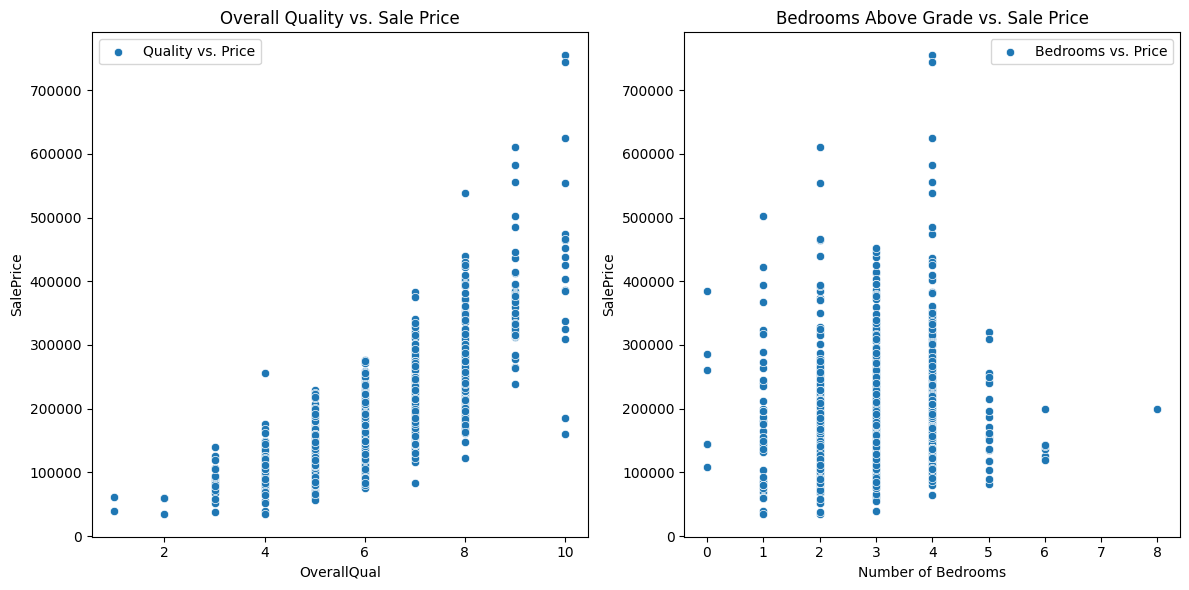

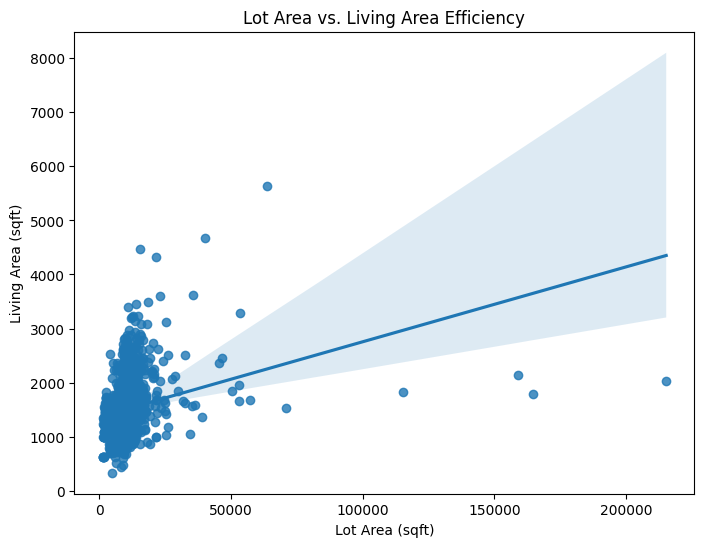

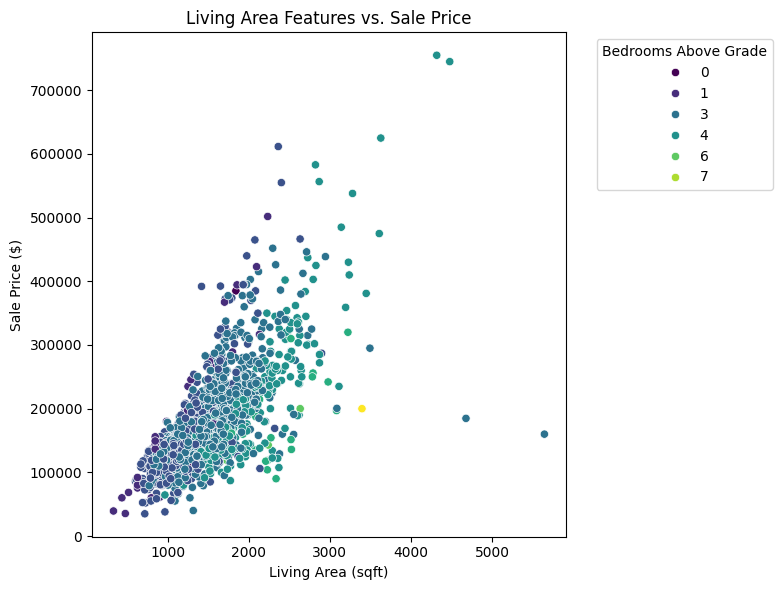

In [32]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
sns.scatterplot(x='OverallQual', y='SalePrice', data=dataset, ax=axs[0], label='Quality vs. Price')
axs[0].set_title('Overall Quality vs. Sale Price')
axs[1].set_xlabel('Number of Bedrooms')
sns.scatterplot(x='BedroomAbvGr', y='SalePrice', data=dataset, ax=axs[1], label='Bedrooms vs. Price')
axs[1].set_title('Bedrooms Above Grade vs. Sale Price')
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
sns.regplot(x='LotArea', y='GrLivArea', data=dataset)
plt.title('Lot Area vs. Living Area Efficiency')
plt.xlabel('Lot Area (sqft)')
plt.ylabel('Living Area (sqft)')
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x="GrLivArea", y="SalePrice", hue="BedroomAbvGr", data=dataset, palette="viridis")
plt.title('Living Area Features vs. Sale Price')
plt.xlabel('Living Area (sqft)')
plt.ylabel('Sale Price ($)')
plt.legend(title='Bedrooms Above Grade', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

Overall Quality vs. Sales Price
The Overall Quality vs. Sales Price graph reveals a positive correlation between quality and price. Key insights:

- Higher quality homes (7-10) command higher prices (> $200,000)
- Average quality homes (4-6) cluster around $150,000-$250,000
- Lower quality homes (<4) sell for < $150,000
- Quality scores 0-3 are scarce, indicating low demand

Bedrooms Above Grade vs. Sales Price Insights
1. Optimal bedroom count: 4 bedrooms command highest prices (> $700,000)
2. Price variations:
- 0 bedrooms: $300,000-$400,000
- 1 bedroom: up to $500,000
- 2 bedrooms: above $600,000
- 3 bedrooms: $400,000-$500,000
- 4 bedrooms: peak prices (> $700,000)
- 5+ bedrooms: decreasing prices (< $600,000)
1. Demand trends: Highest demand for 4-bedroom homes, decreasing for larger homes.

Lot Area vs. Living Area Relationship
The scatter plot reveals:
- Rapid living area growth for smaller lots (0-$50,000)
- High-density development for medium lots ($50,000-$100,000)
- Decreasing living area density for larger lots (> $100,000)
- Consistent positive correlation between lot size and living area.

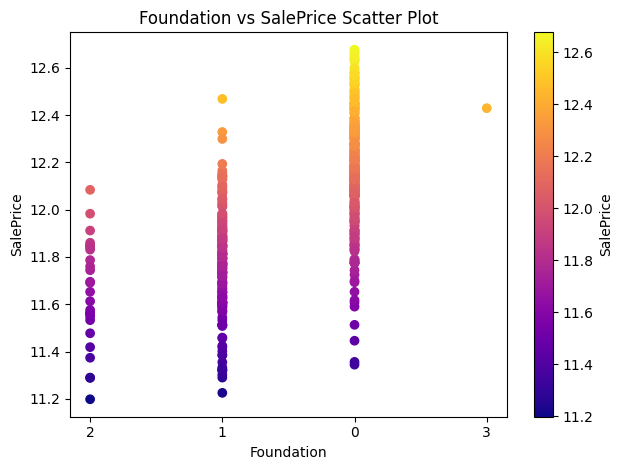

In [33]:
import matplotlib.pyplot as plt

foundation_values = DATASET['Foundation'].unique()
foundation_map = {i: value for i, value in enumerate(foundation_values)}

plt.scatter(DATASET['Foundation'], DATASET['SalePrice'], c=DATASET['SalePrice'], cmap='plasma')

plt.xlabel('Foundation')
plt.ylabel('SalePrice')
plt.title('Foundation vs SalePrice Scatter Plot')

plt.xticks(range(len(foundation_values)), foundation_map.values())

plt.colorbar(label='SalePrice')

plt.tight_layout()
plt.show()

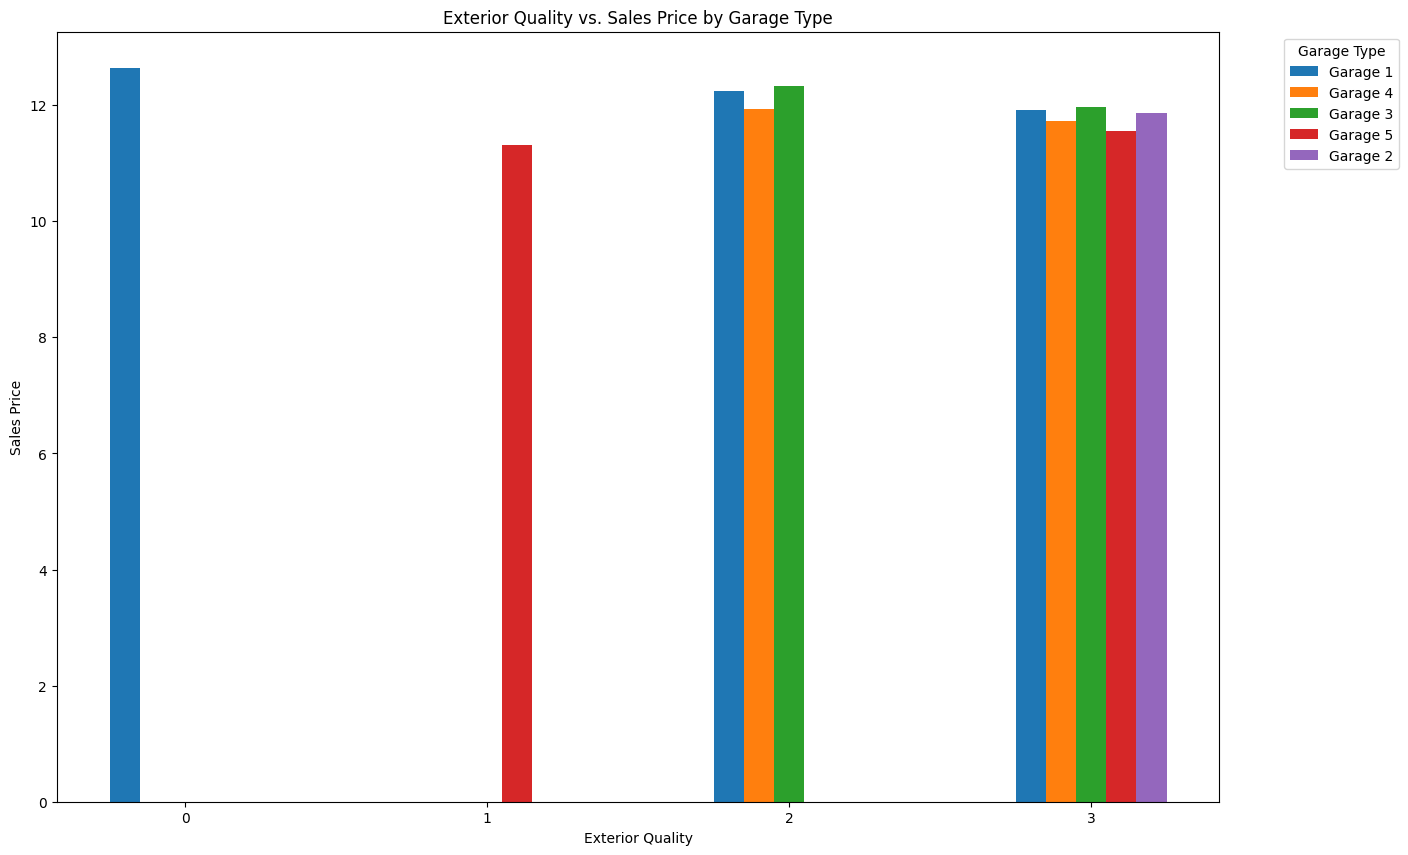

In [34]:
garage_types = DATASET['GarageType'].unique()
garage_type_labels = {0: 'Garage 1', 1: 'Garage 2', 2: 'Garage 3', 3: 'Garage 4', 4: 'Garage 5'}
grouped_data_set = DATASET.groupby(['ExterQual', 'GarageType'])['SalePrice'].mean().reset_index()
ext_qual = grouped_data_set['ExterQual'].unique()

x_values = np.arange(len(ext_qual))
bar_width = 0.1
plt.figure(figsize=(15,10))

for idx, garage_type in enumerate(garage_types):
    garage_type_df = grouped_data_set[grouped_data_set['GarageType'] == garage_type]
    padded_df = garage_type_df.set_index('ExterQual').reindex(ext_qual).fillna(0)
    plt.bar(x_values + idx * bar_width, padded_df['SalePrice'], width=bar_width, label=garage_type_labels[garage_type])

plt.xlabel('Exterior Quality')
plt.ylabel('Sales Price')
plt.title('Exterior Quality vs. Sales Price by Garage Type')
plt.legend(title='Garage Type', bbox_to_anchor=(1.05, 1))
plt.xticks(x_values + bar_width * (len(garage_types) - 1) / 2, ext_qual)
plt.show()

Exterior Quality vs. Sales Price by Garage Type

This graph analyzes sales price variations across Exterior Quality levels for five garage types.
1. Garage 1 dominance: Highest sales price ($12,000+) at Exterior Quality 0 and 1.
2. Convergence at Quality 3: Garage Types 1, 3, and 4 reach similar prices (> $12,000).
3. Garage 5 emergence: Notable sales price ($10,000+) at Exterior Quality 2.
4. Garage 4 potential: Consistent sales price growth across quality levels.

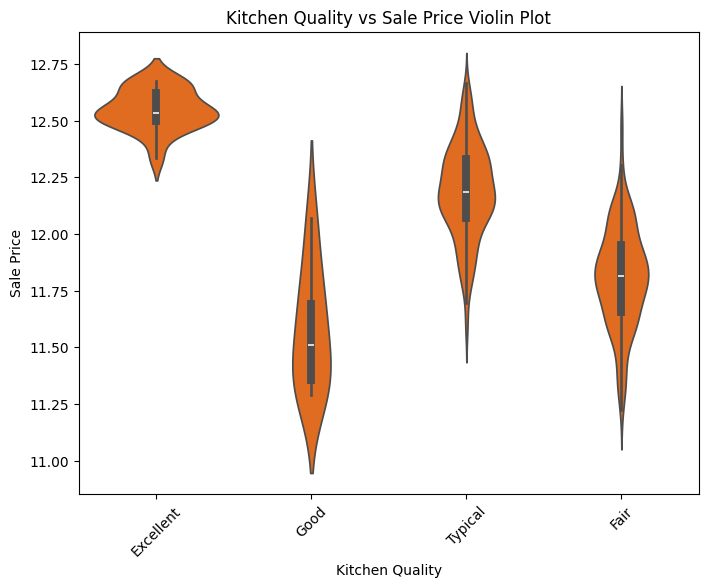

In [35]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='KitchenQual', y='SalePrice', data=DATASET, color='#FF6600') 
plt.title('Kitchen Quality vs Sale Price Violin Plot')
plt.xlabel('Kitchen Quality')
plt.ylabel('Sale Price')
plt.xticks([0, 1, 2, 3], ['Excellent', 'Good', 'Typical', 'Fair'], rotation=45)
plt.show()

Label Encoding

- Label Encoding should be performed before Feature Engineering to convert categorical variables into numerical values, enabling machine learning algorithms to process them.

In [36]:
categorical_cols = DATASET.select_dtypes(include=['object']).columns

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in categorical_cols:
    DATASET[col] = le.fit_transform(DATASET[col])

Feature Engineering :-

New Features

In [37]:
DATASET['price_per_sqft'] = DATASET['SalePrice'] / DATASET['GrLivArea']

DATASET['room_ratio'] = DATASET['BedroomAbvGr'] / DATASET['FullBath']

DATASET['lot_to_sqft_ratio'] = DATASET['LotArea'] / DATASET['GrLivArea']

DATASET['avg_room_size'] = DATASET['GrLivArea'] / (DATASET['BedroomAbvGr'] + DATASET['FullBath'])

DATASET['total_living_area'] = DATASET['GrLivArea'] + DATASET['TotalBsmtSF']


The columns(GrLivArea,LotArea,BedroomAbvGr,FullBath,YearBuilt,YearRemodAdd,otalBsmtSF)are relevant for scaling because they:

1. Influence housing prices: Living area, lot size, number of bedrooms, and bathrooms impact property values.
2. Have varying scales: These columns have different units and magnitudes, which can affect model performance.
3. Require normalization: Scaling ensures that these features contribute equally to the model, preventing feature dominance.

In [38]:
columns_to_scale = [
    'GrLivArea', 
    'LotArea', 
    'BedroomAbvGr', 
    'FullBath', 
    'YearBuilt', 
    'YearRemodAdd', 
    'TotalBsmtSF'
]

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
DATASET[columns_to_scale] = scaler.fit_transform(DATASET[columns_to_scale])


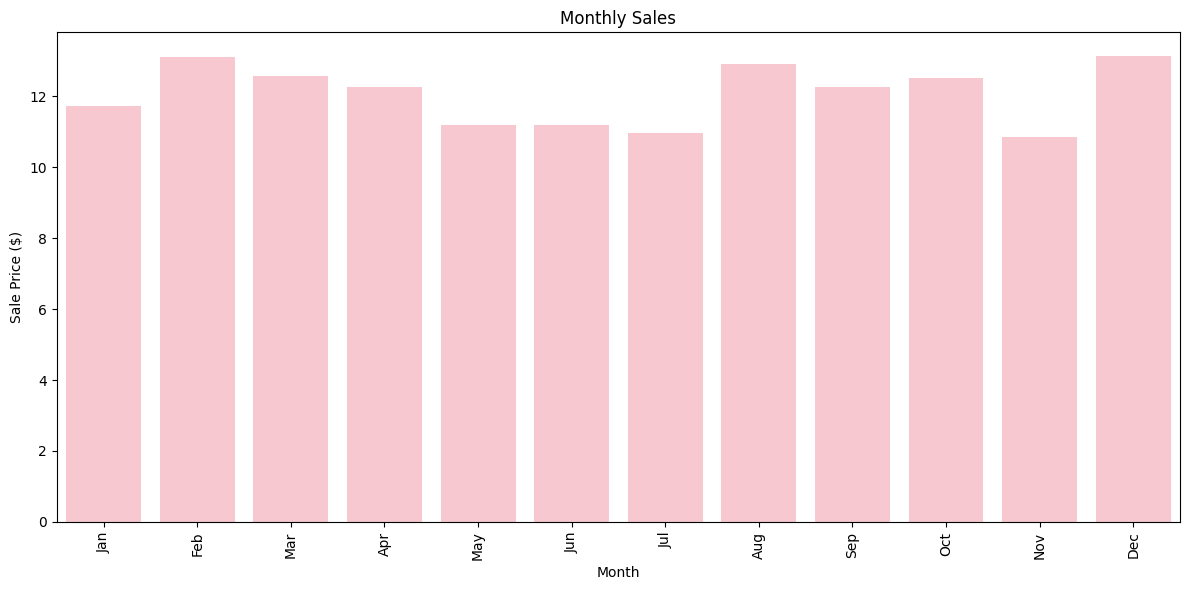

In [39]:
avg_sales = DATASET['SalePrice'].mean()
np.random.seed(42)
monthly_sales = pd.DataFrame({
    'Month': ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
    'SalePrice': avg_sales + np.random.uniform(-0.1, 0.1, size=12) * avg_sales
})

plt.figure(figsize=(12,6))
sns.barplot(x='Month', y='SalePrice', data=monthly_sales, color='#FFC0CB') 
plt.title('Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Sale Price ($)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

- The plot shows the monthly sales.
- This simulation can help analyze sales trends.

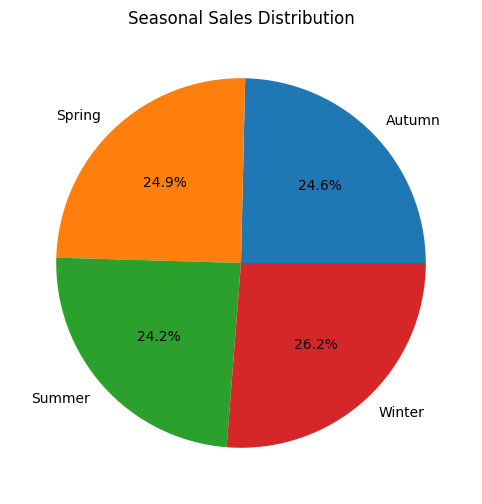

In [40]:
season_map = { 
    'Dec': 'Winter', 'Jan': 'Winter', 'Feb': 'Winter', 
    'Mar': 'Spring', 'Apr': 'Spring', 'May': 'Spring', 
    'Jun': 'Summer', 'Jul': 'Summer', 'Aug': 'Summer', 
    'Sep': 'Autumn', 'Oct': 'Autumn', 'Nov': 'Autumn' 
}

monthly_sales['Season'] = monthly_sales['Month'].map(season_map)
seasonal_sales = monthly_sales.groupby('Season')['SalePrice'].sum()

plt.figure(figsize=(8,6))
plt.pie(seasonal_sales.values, labels=seasonal_sales.index, autopct='%1.1f%%')
plt.title('Seasonal Sales Distribution')
plt.show()

- Creates a new Date column by combining YrSold (year) and Month columns.
- Assumes the day is 1 for each month.
- Extracts the quarter (1-4) from the Date column.
- Converts quarter to string for categorical analysis.

In [41]:
month_map = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6, 
             'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}

DATASET['Monthly_Sales'] = np.random.choice(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                                             'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], 
                                            size=len(DATASET))

DATASET['Month'] = DATASET['Monthly_Sales'].map(month_map)

DATASET['Date'] = pd.to_datetime(DATASET[['YrSold', 'Month']].rename(columns={'YrSold': 'year', 'Month': 'month'}).assign(day=1))
DATASET['QuarterSold'] = DATASET['Date'].dt.quarter.astype(str)

Initially, discrepancies between 'Month' and 'Monthly_Sales' columns were identified

In [42]:
mismatches = DATASET[DATASET['Month'] != DATASET['Monthly_Sales']]
print(mismatches)

      MSSubClass  MSZoning  LotFrontage   LotArea  Neighborhood  OverallQual  \
0              8         2     8.062258  0.106738             4          7.0   
2              8         2     8.246211  0.720283             4          7.0   
4              8         2     9.165151  1.228545            14          8.0   
6              4         2     8.660254  0.485718            20          8.0   
10             4         2     8.366600  0.710734            18          5.0   
...          ...       ...          ...       ...           ...          ...   
1451           4         2     8.831761  0.303435            20          8.0   
1452           2         3     5.916080 -1.678177             6          5.0   
1453           4         2     9.486833  1.632511            10          5.0   
1454           4         0     7.874008 -0.148933            20          7.0   
1455           8         2     7.874008 -0.032936             7          6.0   

      OverallCond  YearBuilt  YearRemod

Tried to resolve the issue

In [43]:
DATASET['Monthly_Sales'] = DATASET['Month']

Re-running the same,confirmed zero mismatches, verifying successful resolution.

In [44]:
mismatches = DATASET[DATASET['Month'] != DATASET['Monthly_Sales']]
print(mismatches)

Empty DataFrame
Columns: [MSSubClass, MSZoning, LotFrontage, LotArea, Neighborhood, OverallQual, OverallCond, YearBuilt, YearRemodAdd, Exterior1st, Exterior2nd, MasVnrArea, ExterQual, Foundation, BsmtQual, BsmtFinType1, BsmtFinSF1, BsmtUnfSF, TotalBsmtSF, HeatingQC, 1stFlrSF, 2ndFlrSF, GrLivArea, BsmtFullBath, FullBath, HalfBath, BedroomAbvGr, KitchenQual, TotRmsAbvGrd, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, WoodDeckSF, OpenPorchSF, YrSold, SalePrice, price_per_sqft, room_ratio, lot_to_sqft_ratio, avg_room_size, total_living_area, Monthly_Sales, Month, Date, QuarterSold]
Index: []

[0 rows x 49 columns]


One-Hot Encoding (OHE) to convert categorical variables into numerical representations.
1. Machine learning algorithms require numerical inputs: Many algorithms can't handle categorical data directly.
2. Preserve categorical relationships: OHE maintains the relationships between categories.

In [45]:
season_map = {1: 'Winter', 2: 'Winter', 3: 'Spring', 4: 'Spring', 5: 'Spring', 
              6: 'Summer', 7: 'Summer', 8: 'Summer', 9: 'Autumn', 10: 'Autumn', 
              11: 'Autumn', 12: 'Winter'}

DATASET['Season'] = DATASET['Month'].map(season_map)

categorical_cols = ['Season', 'QuarterSold', 'Exterior1st', 'Exterior2nd']
DATASET = pd.get_dummies(DATASET, columns=categorical_cols, drop_first=True)

In [46]:
DATASET['SalePrice_Log'] = np.log(DATASET['SalePrice'])

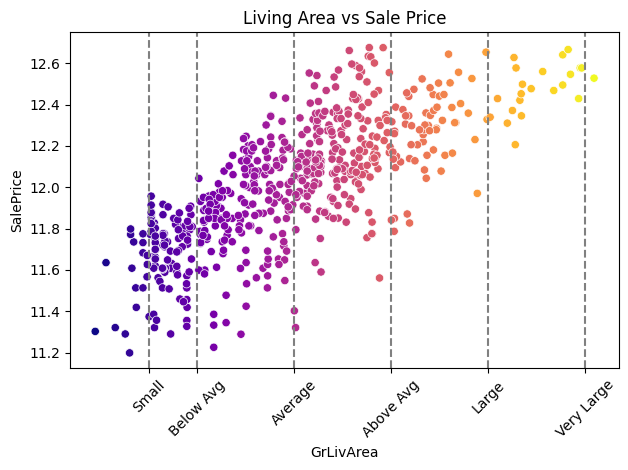

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x='GrLivArea', y='SalePrice', data=DATASET, hue='GrLivArea', 
                palette="plasma", legend=False)

original_mean = DATASET['GrLivArea'].mean()
original_std = DATASET['GrLivArea'].std()
interpretation_guide = {
    -1.5: "Small",
    -1: "Below Avg",
    0: "Average",
    1: "Above Avg",
    2: "Large",
    3: "Very Large",
}

plt.axvline(x=original_mean-1.5*original_std, color='gray', linestyle='--')
plt.axvline(x=original_mean-1*original_std, color='gray', linestyle='--')
plt.axvline(x=original_mean, color='gray', linestyle='--')
plt.axvline(x=original_mean+1*original_std, color='gray', linestyle='--')
plt.axvline(x=original_mean+2*original_std, color='gray', linestyle='--')
plt.axvline(x=original_mean+3*original_std, color='gray', linestyle='--')

plt.xticks([original_mean-1.5*original_std, original_mean-1*original_std, 
            original_mean, original_mean+1*original_std, 
            original_mean+2*original_std, original_mean+3*original_std], 
            list(interpretation_guide.values()), rotation=45)

plt.title('Living Area vs Sale Price')
plt.tight_layout()
plt.show()

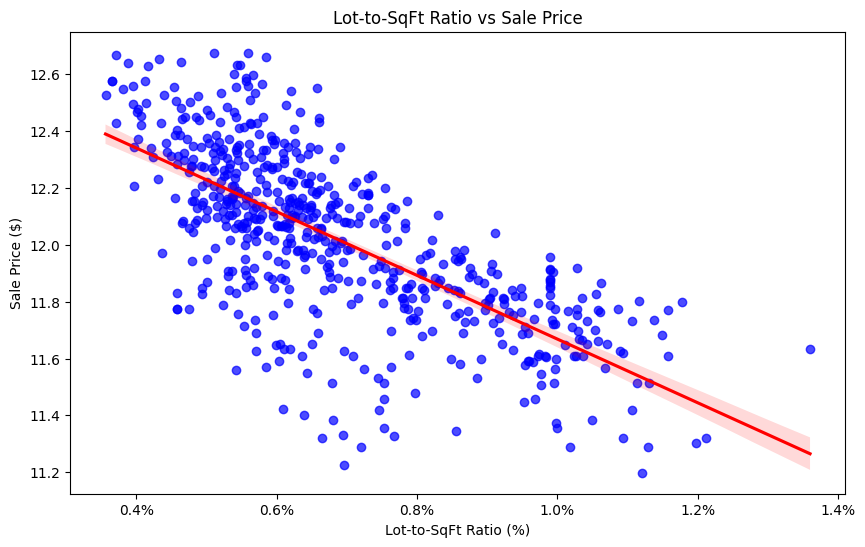

In [48]:
plt.figure(figsize=(10,6))
sns.regplot(x='lot_to_sqft_ratio', y='SalePrice', data=DATASET, 
            scatter_kws={'color':'blue', 'alpha':0.7}, 
            line_kws={'color':'red'})

plt.title('Lot-to-SqFt Ratio vs Sale Price')
plt.xlabel('Lot-to-SqFt Ratio (%)')
plt.ylabel('Sale Price ($)')
plt.xticks([0.004, 0.006, 0.008, 0.010, 0.012, 0.014], 
           ['0.4%', '0.6%', '0.8%', '1.0%', '1.2%', '1.4%'])
plt.show()

Creating new feature Room_Ratio_Total_Living_Area_Interaction 

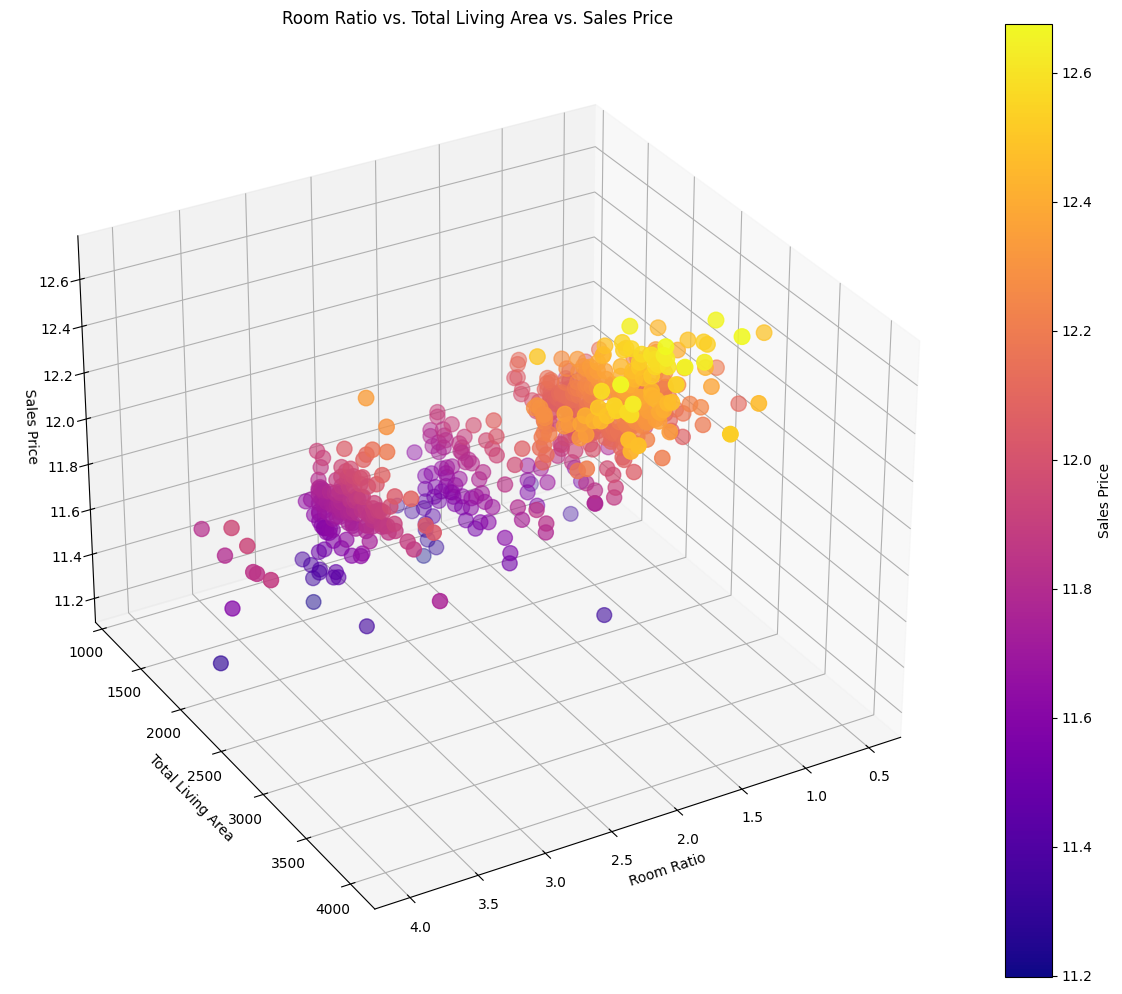

In [49]:
DATASET['Room_Ratio_Total_Living_Area_Interaction'] = DATASET['room_ratio'] * DATASET['total_living_area']**1.5

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(DATASET['room_ratio'], DATASET['total_living_area'], DATASET['SalePrice'],
                     c=DATASET['SalePrice'], cmap='plasma', s=DATASET['SalePrice']*10)

ax.set_xlabel('Room Ratio')
ax.set_ylabel('Total Living Area')
ax.set_zlabel('Sales Price')
ax.set_title('Room Ratio vs. Total Living Area vs. Sales Price')

ax.grid(True)
ax.view_init(elev=30, azim=60)

plt.colorbar(scatter, label='Sales Price')  # Pass scatter object
plt.tight_layout()
plt.show()

Adding many new features, can introduce outliers. Detecting and removing outliers after feature engineering

In [50]:
from scipy import stats
DATASET['SalePrice'] = stats.mstats.winsorize(DATASET['SalePrice'], limits=[0.005, 0.005])

In [51]:
Q1 = DATASET['SalePrice_Log'].quantile(0.25)
Q3 = DATASET['SalePrice_Log'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
iqr_filtered_entries = (DATASET['SalePrice_Log'] > lower_bound) & (DATASET['SalePrice_Log'] < upper_bound)
DATASET_filtered = DATASET[iqr_filtered_entries]

In [52]:
print(f"Original dataset size: {len(DATASET)}")
print(f"Filtered dataset size: {len(DATASET_filtered)}")
print(f"Removed outliers: {len(DATASET) - len(DATASET_filtered)}")

Original dataset size: 597
Filtered dataset size: 596
Removed outliers: 1


Market Trends and Historical Pricing :-

- Analyzing historical data to identify patterns, trends, and correlations between market indicators and housing prices


In [53]:
yearly_sales = DATASET.groupby('YrSold')['SalePrice'].describe()
print(yearly_sales)

        count       mean       std        min        25%        50%  \
YrSold                                                                
2006.0  140.0  12.027993  0.287926  11.326596  11.830286  12.048674   
2007.0  129.0  12.019358  0.312091  11.288531  11.771436  12.007012   
2008.0  121.0  11.994030  0.287976  11.288531  11.824080  12.054668   
2009.0  140.0  12.030351  0.307369  11.320554  11.809681  12.062490   
2010.0   67.0  12.033754  0.324052  11.289782  11.840388  12.089539   

              75%        max  
YrSold                        
2006.0  12.239852  12.641097  
2007.0  12.252479  12.666657  
2008.0  12.165251  12.628067  
2009.0  12.230128  12.666657  
2010.0  12.278626  12.666657  


Yearly Sales Trends

- Analyzed distribution of SalePrice across different years using YrSold column.
- Visualized historical price trends using line plots.

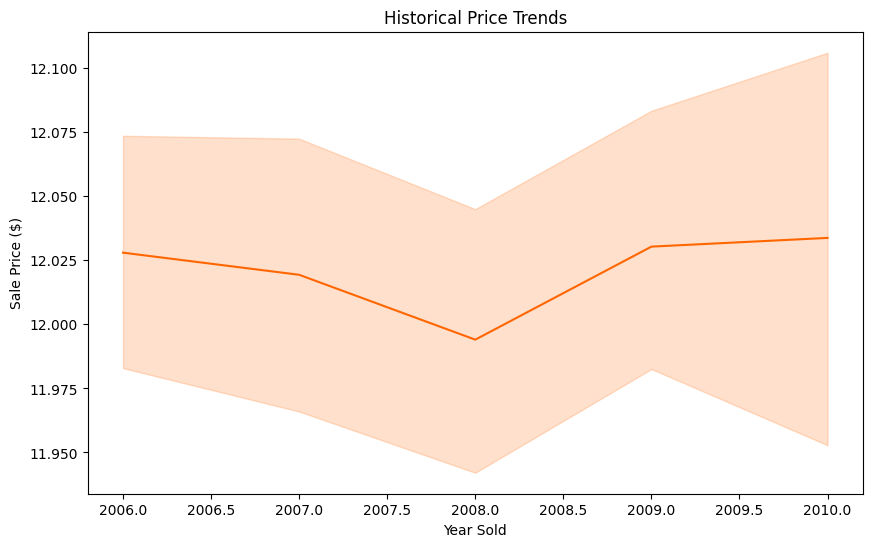

In [54]:
plt.figure(figsize=(10,6))
sns.lineplot(x='YrSold', y='SalePrice', data=DATASET, color='#FF6600')
plt.title('Historical Price Trends')
plt.xlabel('Year Sold')
plt.ylabel('Sale Price ($)')
plt.show()

Regional Trends

In [55]:
neighborhood_sale_price_trends = DATASET.groupby('Neighborhood')['SalePrice'].mean().reset_index()

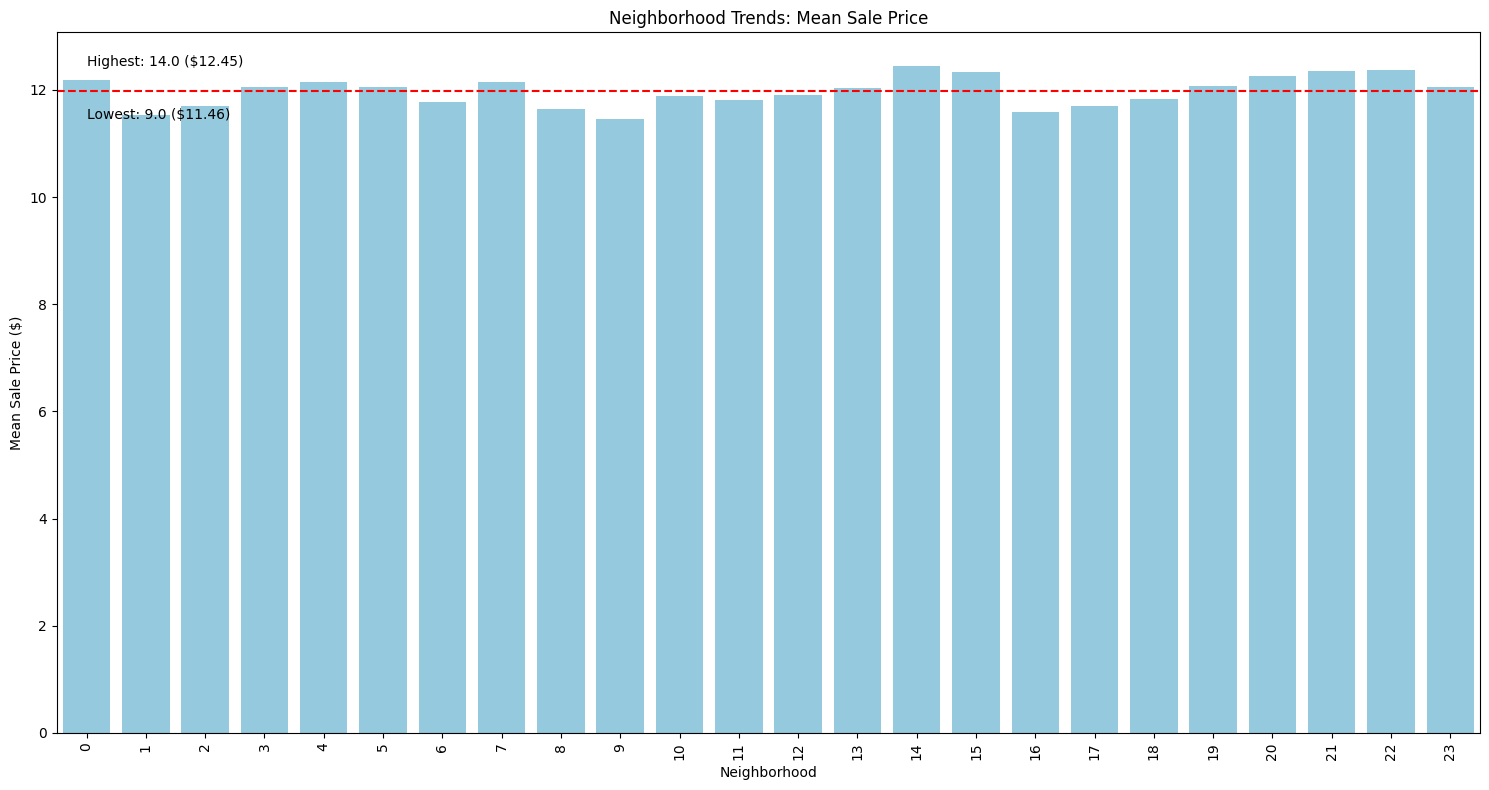

In [56]:
plt.figure(figsize=(15,8))
sns.barplot(x='Neighborhood', y='SalePrice', data=neighborhood_sale_price_trends, color="skyblue")

plt.title('Neighborhood Trends: Mean Sale Price')
plt.xlabel('Neighborhood')
plt.ylabel('Mean Sale Price ($)')
plt.xticks(rotation=90)

top_performer = neighborhood_sale_price_trends.loc[neighborhood_sale_price_trends['SalePrice'].idxmax()]['Neighborhood']
bottom_performer = neighborhood_sale_price_trends.loc[neighborhood_sale_price_trends['SalePrice'].idxmin()]['Neighborhood']

plt.axhline(neighborhood_sale_price_trends['SalePrice'].mean(), color='red', linestyle='--')
plt.annotate(f'Highest: {top_performer} (${neighborhood_sale_price_trends["SalePrice"].max():.2f})',
xy=(0, neighborhood_sale_price_trends['SalePrice'].max()), ha='left')
plt.annotate(f'Lowest: {bottom_performer} (${neighborhood_sale_price_trends["SalePrice"].min():.2f})',
xy=(0, neighborhood_sale_price_trends['SalePrice'].min()), ha='left')
plt.tight_layout()
plt.show()

- Neighborhood 14 has the highest mean sale price ($12.451658)
- Neighborhood 9 has the lowest mean sale price ($11.461527)

Fireplaces

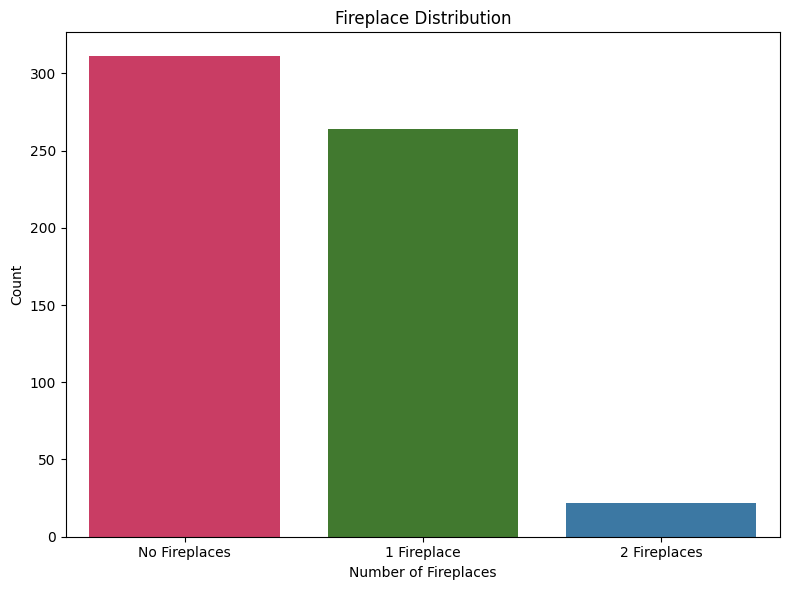

In [57]:
plt.figure(figsize=(8,6))
sns.countplot(x='Fireplaces', data=DATASET, 
              palette=sns.husl_palette(len(DATASET['Fireplaces'].unique()), l=.5), 
              hue='Fireplaces', legend=False)

plt.title('Fireplace Distribution')
plt.xlabel('Number of Fireplaces')
plt.ylabel('Count')
plt.xticks(rotation=0, ticks=[0, 1, 2], 
           labels=['No Fireplaces', '1 Fireplace', '2 Fireplaces'])
plt.tight_layout()
plt.show()

Data Insights

1. No Fireplaces: 311 homes (44.8% of total)
2. 1 Fireplace: 264 homes (38.0% of total)
3. 2 Fireplaces: 22 homes (3.2% of total)

In [58]:
amenities = ['GarageType', 'GarageCars', 'BedroomAbvGr', 'FullBath', 'GrLivArea', 'SalePrice']
df_amenities = DATASET[amenities]

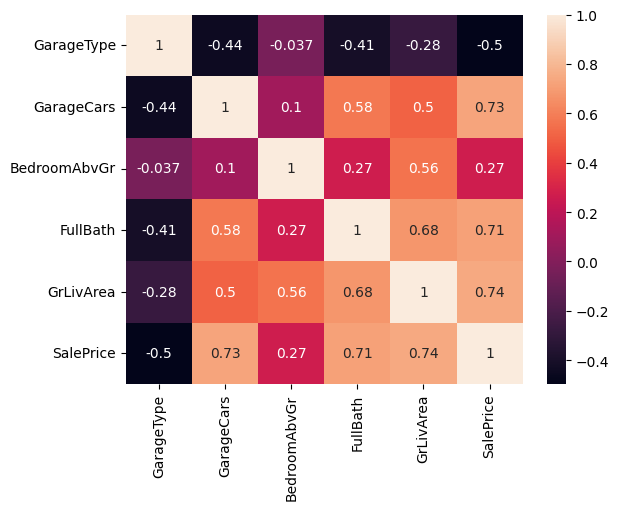

In [59]:
sns.heatmap(df_amenities.corr(), annot=True)
plt.show()